In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load csv with stations' metadata so we can identify stations' ids:

In [2]:
col_stations = ['province','id','name','longitude','latitude','height','unknown']
stationsID = pd.read_csv('data\ESTACIONES.txt', sep=';', header=None, names=col_stations).drop(columns='unknown')
stationsID

,province,id,name,longitude,latitude,height
0,BARCELONA,1203,BALENYA,2.26,41.85,570
1,BURGOS,9069,MIRANDA DE EBRO,-2.96,42.68,520
2,HUESCA,9489,LA SOTONERA EMBALSE,-0.67,42.11,413
3,NAVARRA,9269,ALSASUA,-2.18,42.89,525
4,NAVARRA,9301,MONTEAGUDO,-1.69,41.96,410
5,SORIA,2030,SORIA 'OBSERVATORIO',-2.48,41.77,1082
6,SORIA,2085,EL BURGO DE OSMA,-3.07,41.59,895
7,TARRAGONA,1017,VILASECA,1.15,41.11,53
8,TARRAGONA,9971,TIVISSA,0.73,41.04,310
9,ZARAGOZA,9390,DAROCA OBSERVATORIO,-1.41,41.11,779


Now we read climate data from different stations into a dictionary and then merge into one Data Frame:

In [3]:
#col_station = ['year','temperature']
station = {}
for id in stationsID['id'].iteritems():
    station[str(id[1])] = pd.read_csv('data/Tmin_'+str(id[1])+'_filled_annual_means.txt', sep='    ',
                                      header=None, names=['year',str(id[1])], engine='python').set_index('year')
stations = pd.concat(station.values(),axis=1)
stations.index.name=None
stations.head()

,1203,9069,9489,9269,9301,2030,2085,1017,9971,9390,9523,9371
1956,5.56123,7.92211,7.72084,6.19617,5.82826,1.32384,1.73872,10.1185,8.16141,6.61261,7.91825,4.61540
1957,4.98041,8.63398,8.17260,7.34303,6.66681,1.97370,1.15640,10.5183,8.58456,7.26526,8.30919,5.07892
1958,5.96169,9.97144,9.59621,7.55125,7.41064,3.44861,2.49214,11.9026,9.59260,8.51326,9.41647,6.30164
1959,6.51167,9.87581,9.98493,6.89783,7.44723,4.06046,4.53880,12.6202,9.76165,8.73918,9.45702,6.85304
1960,6.52788,9.61240,9.48082,6.62796,7.30628,3.24076,3.70945,11.9556,9.17480,8.52391,8.87280,6.26711


Now we choose the origin or studied station:

1956    7.72084
1957    8.17260
1958    9.59621
1959    9.98493
1960    9.48082
1961    9.47640
1962    9.19167
1963    8.80165
1964    9.11081
1965    7.75566
1966    9.62110
1967    9.11726
1968    9.41743
1969    6.98790
1970    6.91014
1971    6.82082
1972    6.55315
1973    6.55040
1974    6.31945
1975    6.57480
1976    6.65507
1977    7.14603
1978    6.96055
1979    7.43593
1980    6.83425
1981    8.22278
1982    8.10849
1983    7.57781
1984    6.78110
1985    7.02055
1986    7.38822
1987    7.92877
1988    7.36740
1989    8.78137
1990    8.69617
1991    8.34352
1992    7.70271
1993    8.16630
1994    8.87703
1995    8.52986
1996    8.49671
1997    8.00521
1998    6.96603
Name: 9489, dtype: float64

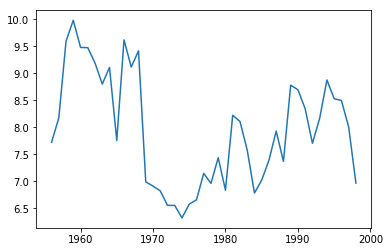

In [4]:
origin = '9489'
stations[origin].plot.line()
oriSeries = stations[origin]
oriSeries

Then we have to calculate the difference between years so discontinuities in other series lose weight

In [5]:
ydiff ={}
for col in stations.columns[:]:
    ydiff[col] = stations[col].shift(-1)-stations[col]
yearDiff = pd.concat(ydiff.values(), axis=1).drop(1998)

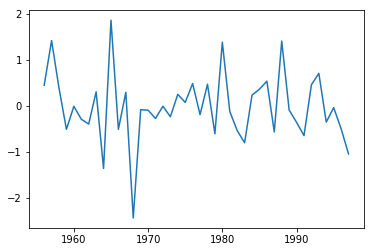

In [6]:
yearDiff[origin].plot.line()

At this point we can look for the stations with the best correlation in the year difference and took the first five:

In [7]:
correlations = yearDiff.corr(method='pearson')
bestSts = correlations[origin][correlations[origin] > 0.35].drop(origin).sort_values(ascending=False).head(5) \
            .to_frame(name='corrCoef')
bestSts['corrCoef2'] = bestSts['corrCoef']**2

Create a reference series with the five stations, weighted with R<sup>2</sup> 

In [16]:
refDict = {}
for index in bestSts.index:
    refDict[index] = yearDiff[index]*bestSts['corrCoef2'].loc[index]
refSeriesDiff = pd.concat(refDict.values(), axis=1).sum(axis=1)/bestSts['corrCoef2'].sum()

Taking the most recent data in the original station as valid we apply the annual difference

In [13]:
refSeries = oriSeries.copy()
for i,diff in enumerate(refSeriesDiff.sort_index(ascending=False).tolist()):
    refSeries.loc[1998-(i+1)] = refSeries.loc[1998-i]+diff
refSeries = refSeries.sort_index()

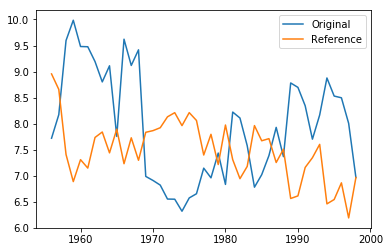

In [14]:
OriRefDF = pd.concat({'Reference':refSeries, 'Original':oriSeries}, axis=1)
OriRefDF.plot.line()

In [11]:
OriRef['diff']=OriRef['']

NameError: name 'OriRef' is not defined